In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt # 可视化模块

Using TensorFlow backend.


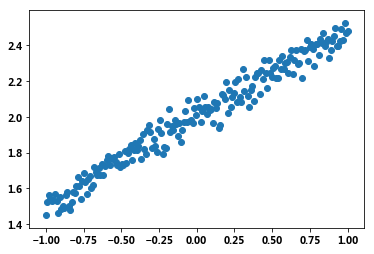

In [2]:
# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()

In [3]:
X_train, Y_train = X[:160], Y[:160]     # train 前 160 data points
X_test, Y_test = X[160:], Y[160:]       # test 后 40 data points

In [4]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))

/Users/scrappy_zhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


In [5]:
# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')

In [6]:
# training
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

Training -----------
train cost:  4.0225
train cost:  0.0732386
train cost:  0.00386274
train cost:  0.00264345


In [7]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
40/40 [==============================] - 0s 278us/step
test cost: 0.00313670327887
Weights= [[ 0.4922711]] 
biases= [ 1.99950218]


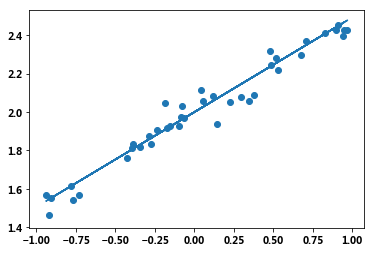

In [8]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()